In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas
import os
import utils

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [28]:
dataPath = os.path.join(os.getenv("HOME"), 
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersLikertByItem.csv')

data = pandas.read_csv(dataPath, sep=',')
# Make the question column the index, so that
# all operations on the dataframe only address
# the numeric scores:
data = data.set_index('question')
# Replace 0s with their column's median.
data = utils.replaceZerosDataFrame(data, direction='row')


,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s208,s209,s210,s211,s212,s213,s214,s215,s216,s217
question,,,,,,,,,,,,,,,,,,,,,
PersonalExperience|ILackConfidence,35.0,82.0,35.0,53.0,35.0,82.0,47.0,100.0,59.0,41.0,...,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
FeelAbout|HateCulture,37.0,12.0,12.0,12.0,12.0,62.0,12.0,12.0,12.0,37.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
WorkLife|ReceivedBadReview,59.0,94.0,94.0,65.0,94.0,82.0,94.0,100.0,94.0,94.0,...,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0
Team|HardToInfluence,71.0,71.0,59.0,12.0,65.0,59.0,88.0,76.0,65.0,100.0,...,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
Feel|ValuedByManager,87.0,87.0,62.0,87.0,62.0,62.0,87.0,62.0,87.0,37.0,...,87.0,87.0,87.0,87.0,12.0,87.0,37.0,62.0,37.0,62.0
Power|HaveSelfConfidence,37.0,62.0,37.0,62.0,37.0,37.0,37.0,37.0,12.0,87.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
Team|GetsInWay,76.0,88.0,65.0,71.0,88.0,47.0,94.0,100.0,53.0,35.0,...,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
Team|HoHum,82.0,53.0,88.0,53.0,65.0,65.0,88.0,100.0,53.0,88.0,...,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0
Power|MenGetGoodReactions,37.0,37.0,37.0,62.0,12.0,87.0,37.0,87.0,62.0,12.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0


Create info on successively clustering data
into ever larger clusters. Use e.g. the Ward
option, which measures distance between data items
by the difference in their variance (the more similar
the variance the closer they are):
           Feature1   Feature2      Distance   SizeResultingCluster
   array([[  52.     ,   53.     ,    0.04151,    2.     ],
          [  14.     ,   79.     ,    0.05914,    2.     ],
          [  33.     ,   68.     ,    0.07107,    2.     ],
          [  17.     ,   73.     ,    0.07137,    2.     ],
          [   1.     ,    8.     ,    0.07543,    2.     ],
                       ...
          [  62.     ,  152.     ,    0.1726 ,    3.     ],
          [  41.     ,  158.     ,    0.1779 ,    3.     ],
                       ...
          
First line: feature 52 is combined with feature 53 into
a cluster of size 2. Distance in variance between them 
is 0.04151. First cluster of 3: item 62 with 152. The dataset
of this table had data items 0-149. Any 'data item' with a 
number 150 or higher refers to an already formed cluster.
To find items that made up this cluster: 
     theMergeLine = lineGTDataLength - datalength

In [3]:
#data

,question,s0,s1,s2,s3,s4,s5,s6,s7,s8,...,s208,s209,s210,s211,s212,s213,s214,s215,s216,s217
0,PersonalExperience|ILackConfidence,35.0,82.0,35.0,53.0,35.0,82.0,47.0,100.0,59.0,...,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0,59.0
1,FeelAbout|HateCulture,37.0,12.0,12.0,12.0,12.0,62.0,12.0,12.0,12.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
2,WorkLife|ReceivedBadReview,59.0,94.0,94.0,65.0,94.0,82.0,94.0,100.0,94.0,...,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0
3,Team|HardToInfluence,71.0,71.0,59.0,12.0,65.0,59.0,88.0,76.0,65.0,...,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0,65.0
4,Feel|ValuedByManager,87.0,87.0,62.0,87.0,62.0,62.0,87.0,62.0,87.0,...,87.0,87.0,87.0,87.0,12.0,87.0,37.0,62.0,37.0,62.0
5,Power|HaveSelfConfidence,37.0,62.0,37.0,62.0,37.0,37.0,37.0,37.0,12.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
6,Team|GetsInWay,76.0,88.0,65.0,71.0,88.0,47.0,94.0,100.0,53.0,...,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0,76.0
7,Team|HoHum,82.0,53.0,88.0,53.0,65.0,65.0,88.0,100.0,53.0,...,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0,71.0
8,Power|MenGetGoodReactions,37.0,37.0,37.0,62.0,12.0,87.0,37.0,87.0,62.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0
9,Promoted|DontWantClimb,62.0,37.0,37.0,37.0,87.0,87.0,62.0,87.0,12.0,...,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0,37.0


In [55]:
#clusterInfo = linkage(data, 'ward')      # c=0.61
#clusterInfo = linkage(data, 'centroid')  # c=0.84
#clusterInfo = linkage(data, 'weighted')  # c=0.79
#clusterInfo = linkage(data, 'average')   # c=0.86
#clusterInfo = linkage(data, 'complete')  # c=0.85
clusterInfo = linkage(data, 'single')    # c=0.47

# Cophenet correlation coefficient measures 
# how faithfully a dendrogram preserves pairwise
# distance between the original data points:
(c, coph_dists) = cophenet(clusterInfo, pdist(scores))
c

0.46911469723148808

In [56]:
pandas.DataFrame(clusterInfo[:20],columns=['feature1', 'feature2', 'distance', 'clusterSize'])

,feature1,feature2,distance,clusterSize
0,19.0,119.0,0.000000,2.0
1,43.0,121.0,0.000000,3.0
2,78.0,122.0,0.000000,4.0
3,111.0,123.0,0.000000,5.0
4,50.0,81.0,56.320511,2.0
5,40.0,107.0,90.138782,2.0
6,39.0,126.0,125.000000,3.0
7,90.0,127.0,152.069063,4.0
8,103.0,125.0,157.232312,3.0
9,21.0,128.0,167.705098,5.0


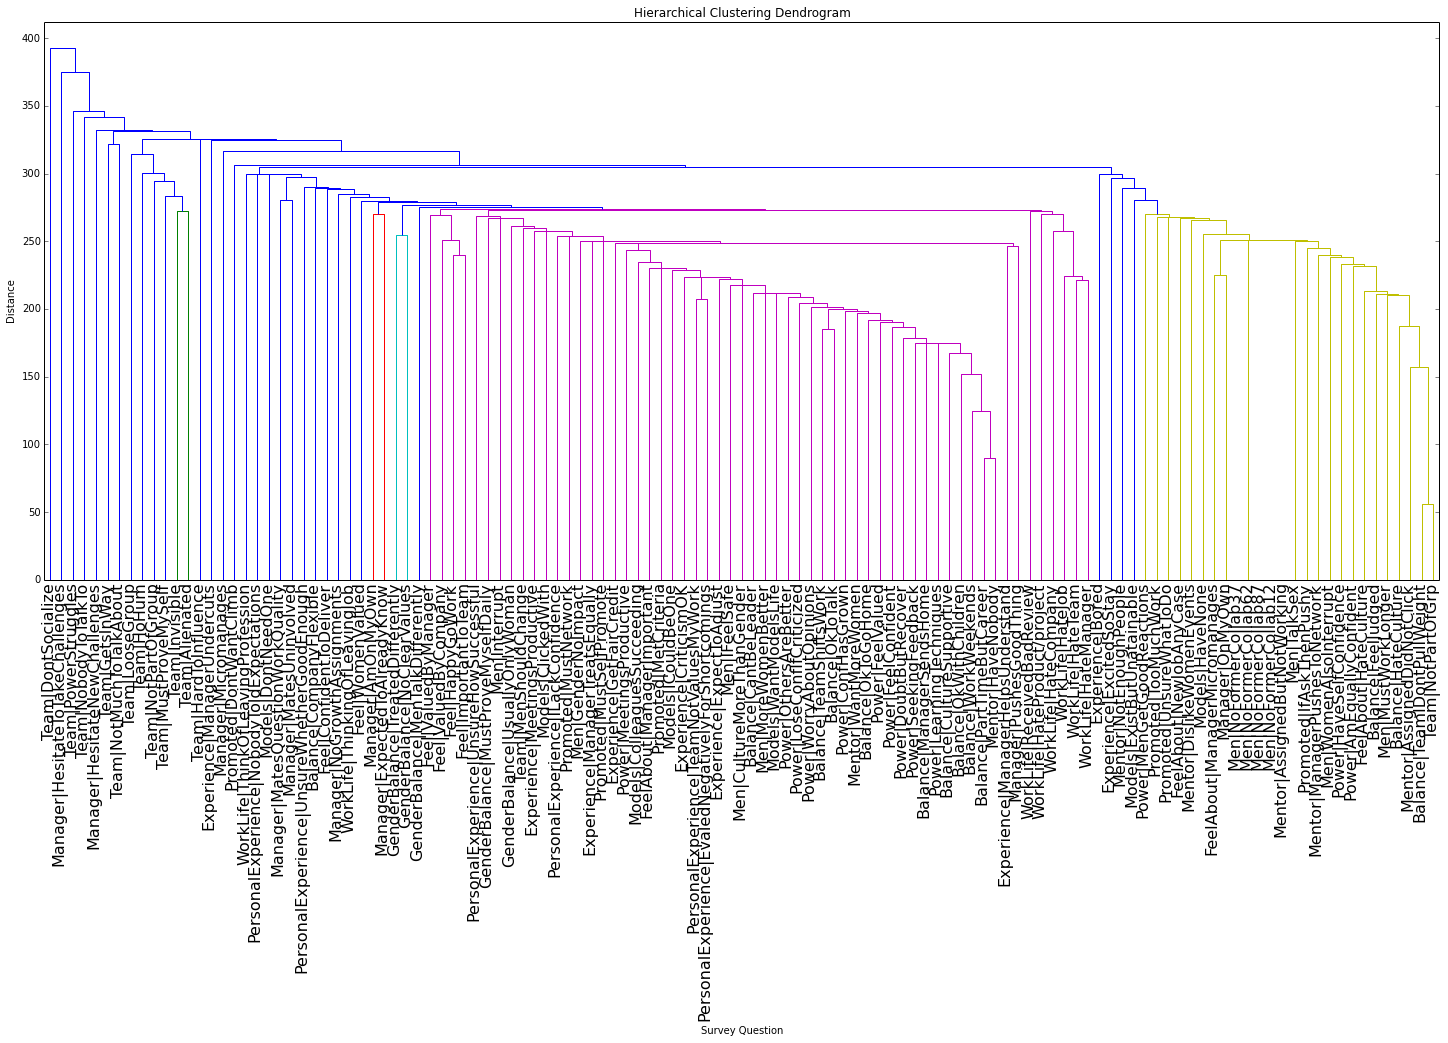

In [57]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Survey Question')
plt.ylabel('Distance')
dendrogram(
    clusterInfo,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    labels=data.index,  # question names
)
plt.show()



In [39]:
# set cut-off to 50
max_d = 750 # max_d as in max_distance

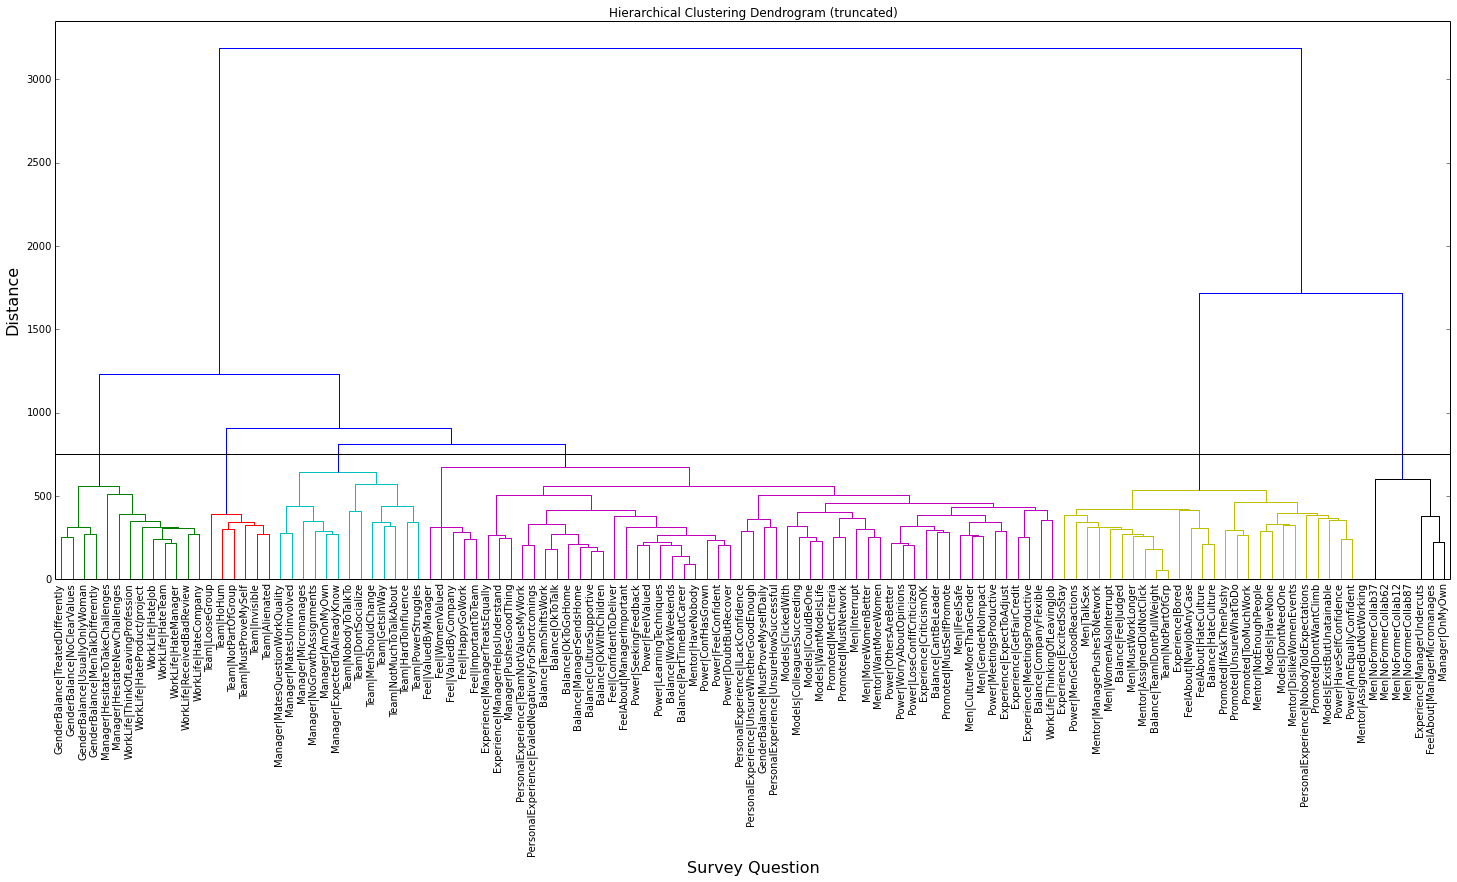

In [41]:
plt.figure(figsize=(25, 10))
utils.fancy_dendrogram(
    clusterInfo,
    x_label='Survey Question',
    #***truncate_mode='lastp',
    p=4,
    leaf_rotation=90.,
    leaf_font_size=10.,
    x_axis_font_size=16.,
    y_axis_font_size=16.,
    labels=dataNew.index,
    show_contracted=True,
    annotate_above=10000, # Make high enough never to get distance labels in chart
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

